# Eesmärk
Luua funktsioon *getCommand(image)*.
Funktsioon võtab ette pildifaili ja tagastab enumi pildil olevast käsust näiteks sõnena.   
Funktsioonile tuleb lisada ka tõenäoliselt parameeter *mudel* või mingi muu lahendus teha nii, et funktsioon ise mudelit ei valmista. Mudel peaks olema valmis juba enne ja mängu ajal peaks see funktsioon tagastama vastuse kiiresti (alla 1 sekundi kindlasti). Muidu lihtsalt mäng hakkab hakkima.

### Version 1.1 - Katame mängu tegevuse käskudega
Mängu ajal peab olema võimalik kasutada kolme käsku: vasakule, paremale ja power.
Võimalikud tagastusväärtused funktsioonile *getCommand(image)*:


*   "vasak"
*   "parem"
*   "power"
*   "undefined"

### Version 1.2 - Katame ka mängus navigeerimise käskudega
Edasiarendusena võime katta ka mängus navigeerimise nupud käskudega.





In [15]:
#Moodulite installimine
import numpy as np
import os 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [17]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 6,
 '03_fist': 3,
 '04_fist_moved': 4,
 '05_thumb': 8,
 '06_index': 1,
 '07_ok': 5,
 '08_palm_moved': 2,
 '09_c': 9,
 '10_down': 7}

In [19]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

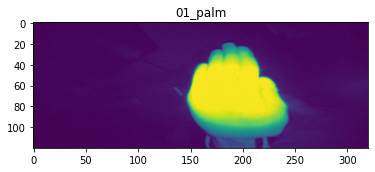

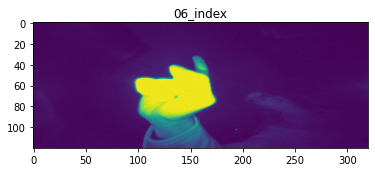

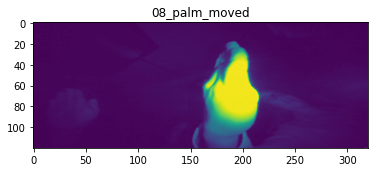

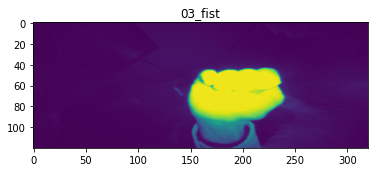

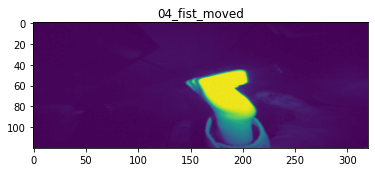

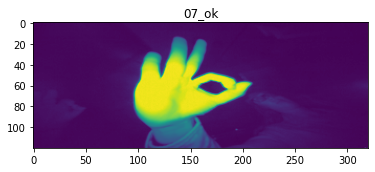

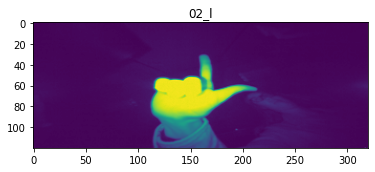

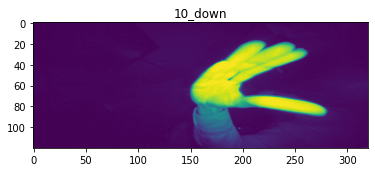

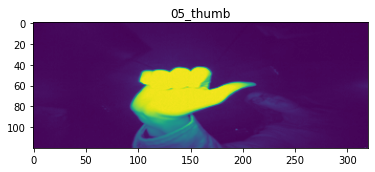

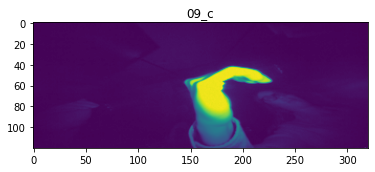

In [20]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [21]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)
from keras import layers
from keras import models

In [22]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 174s 693ms/step - loss: 0.7489 - accuracy: 0.7431 - val_loss: 0.0065 - val_accuracy: 0.9970
Epoch 2/10
250/250 [==============================] - 174s 697ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0064 - val_accuracy: 0.9980
Epoch 3/10
250/250 [==============================] - 173s 691ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0056 - val_accuracy: 0.9975
Epoch 4/10
250/250 [==============================] - 172s 688ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0069 - val_accuracy: 0.9975
Epoch 5/10
250/250 [==============================] - 172s 688ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 2.7285e-04 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 171s 685ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 5.0837e-05 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 172s 687ms/step - loss: 6.4983e-05 - accuracy: 1.0000 - val_lo

In [24]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 6s 90ms/step - loss: 0.0053 - accuracy: 0.9995
Accuracy:0.9994999766349792
